In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [39]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [41]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [42]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [43]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [45]:
model=Sequential()

In [46]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [48]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 78s 430ms/step - loss: 1.2420 - accuracy: 0.4876 - val_loss: 1.2337 - val_accuracy: 0.5203
Epoch 2/10
180/180 [==============================] - 79s 440ms/step - loss: 1.0277 - accuracy: 0.6034 - val_loss: 0.9818 - val_accuracy: 0.6201
Epoch 3/10
180/180 [==============================] - 79s 440ms/step - loss: 0.9715 - accuracy: 0.6236 - val_loss: 0.9336 - val_accuracy: 0.6407
Epoch 4/10
180/180 [==============================] - 76s 423ms/step - loss: 0.9183 - accuracy: 0.6421 - val_loss: 0.8715 - val_accuracy: 0.6704
Epoch 5/10
180/180 [==============================] - 79s 437ms/step - loss: 0.8684 - accuracy: 0.6639 - val_loss: 0.8852 - val_accuracy: 0.6766
Epoch 6/10
180/180 [==============================] - 78s 434ms/step - loss: 0.8410 - accuracy: 0.6762 - val_loss: 0.8209 - val_accuracy: 0.6956
Epoch 7/10
180/180 [==============================] - 77s 429ms/step - loss: 0.7975 - accuracy: 0.6947 - val_loss: 0.7211 - val_ac

In [51]:
model.save('IBM_flowers.h5')

In [52]:
pwd

'/content/drive/MyDrive'

In [53]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('IBM_flowers.h5')

In [66]:
img=image.load_img(r'/content/drive/MyDrive/flowers/rose/11944957684_2cc806276e.jpg')

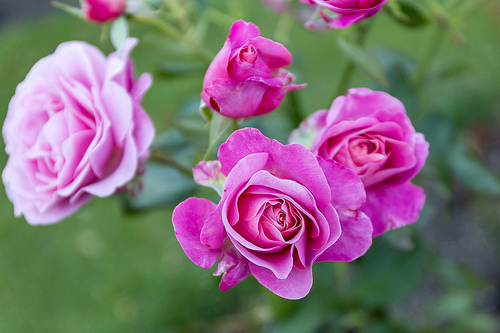

In [67]:
img

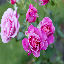

In [68]:
img=image.load_img(r'/content/drive/MyDrive/flowers/rose/11944957684_2cc806276e.jpg',target_size=(64,64))
img

In [69]:
x=image.img_to_array(img)
x

array([[[ 66.,  75.,  84.],
        [ 72.,  79.,  89.],
        [ 74.,  81.,  89.],
        ...,
        [115., 136.,  79.],
        [117., 125.,  74.],
        [122., 130.,  81.]],

       [[ 63.,  73.,  82.],
        [ 70.,  80.,  89.],
        [ 73.,  82.,  91.],
        ...,
        [108., 132.,  74.],
        [118., 126.,  75.],
        [121., 118.,  73.]],

       [[ 58.,  67.,  76.],
        [ 70.,  79.,  88.],
        [ 75.,  85.,  94.],
        ...,
        [102., 134.,  71.],
        [109., 129.,  68.],
        [116., 119.,  72.]],

       ...,

       [[ 96., 137.,  79.],
        [ 93., 132.,  75.],
        [ 92., 131.,  74.],
        ...,
        [ 95., 127., 103.],
        [ 84., 112.,  90.],
        [ 65.,  84.,  78.]],

       [[ 95., 136.,  78.],
        [ 91., 130.,  73.],
        [ 89., 128.,  71.],
        ...,
        [ 94., 129.,  99.],
        [ 94., 124.,  98.],
        [ 79.,  97.,  85.]],

       [[ 93., 134.,  76.],
        [ 92., 131.,  74.],
        [ 87., 1

In [70]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 66.,  75.,  84.],
         [ 72.,  79.,  89.],
         [ 74.,  81.,  89.],
         ...,
         [115., 136.,  79.],
         [117., 125.,  74.],
         [122., 130.,  81.]],

        [[ 63.,  73.,  82.],
         [ 70.,  80.,  89.],
         [ 73.,  82.,  91.],
         ...,
         [108., 132.,  74.],
         [118., 126.,  75.],
         [121., 118.,  73.]],

        [[ 58.,  67.,  76.],
         [ 70.,  79.,  88.],
         [ 75.,  85.,  94.],
         ...,
         [102., 134.,  71.],
         [109., 129.,  68.],
         [116., 119.,  72.]],

        ...,

        [[ 96., 137.,  79.],
         [ 93., 132.,  75.],
         [ 92., 131.,  74.],
         ...,
         [ 95., 127., 103.],
         [ 84., 112.,  90.],
         [ 65.,  84.,  78.]],

        [[ 95., 136.,  78.],
         [ 91., 130.,  73.],
         [ 89., 128.,  71.],
         ...,
         [ 94., 129.,  99.],
         [ 94., 124.,  98.],
         [ 79.,  97.,  85.]],

        [[ 93., 134.,  76.],
       

In [71]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 172ms/step


array([2])

In [72]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [73]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [74]:
index[y[0]]

'rose'